# Google drive authentication process

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
q
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131323 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
!pip install pydrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import os
import pickle as pkl

In [0]:
os.getcwd()

'/content'

# Data Directory

In [0]:
folder = "gdrive/My Drive/Vision_task"
data_dir = './Vision_task_dataset_public'

In [0]:
os.listdir(folder)

['test_image.pkl', 'train_image.pkl', 'train_label.pkl']

In [0]:
with open(folder+'/train_image.pkl','rb') as inp_pickle:
    images = pkl.load(inp_pickle)

    
with open(folder+'/train_label.pkl','rb') as out_pickle:
    y = pkl.load(out_pickle)
# with open(filename, 'wb') as f:
#     classification_dict = pickle.load(f)

# function for shuffling

In [0]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = [0]*len(a)
    shuffled_b = [0]*len(b)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b 

In [0]:
import numpy as np
img = np.array(images[0])
img = np.reshape(img, (28,28))


6

2000


In [0]:
type(images[0])

list

In [0]:
!pip install scikit-learn

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.25, random_state=42)

In [0]:
q#data generator
dataset =  zip(images,y)
count =0
for (image, y) in dataset:
  count=count+1
  


In [0]:
train_size = int(0.8 * len())
val_size = len(images) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(images, [train_size, test_size])

In [0]:
len(x), len(y)

(8000, 8000)

In [0]:
import numpy as np
from PIL import Image

In [0]:
x1 = np.asarray(x[88])
x1  = np.reshape(x1, (28,28))
a = np.random.rand(28,28)
x1.shape

(28, 28)

In [0]:
a = np.reshape(np.array(x[48]), (28,28))

In [0]:
y_train[0]

tensor(2.)

In [0]:
for i in range(28):
    for j in range(28):
        if a[i][j]>0:
            a[i][j] = 255
        else:
            a[i][j] = 0

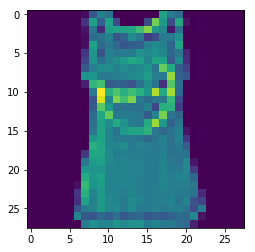

In [0]:
plt.imshow(a)

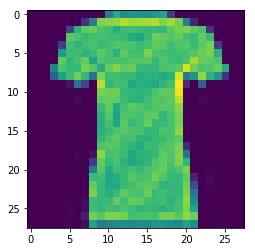

In [0]:
plt.imshow(a)

In [0]:
from PIL import Image
import matplotlib.pyplot as plt

In [0]:
def showimage(x):
    x1 = np.asarray(x)
    x1  = np.reshape(x1, (28,28,1))
    plt.imshow(x1)
    plt.show()

In [0]:
showimage(x[88], 88)

In [0]:
y_dict = dict()
for i in y:
    if i in y_dict.keys():
        y_dict[i] +=1
    else:
        y_dict[i] =1
(y_dict)

{0: 2000, 2: 2000, 3: 2000, 6: 2000}

In [0]:
#change numerical to one-hot

def y_to_onehot(y):
    yy = list()
    for i in range(len(y)):
        if y[i] == 0:
            yy.append([1,0,0,0])
        elif y[i] == 2:
            yy.append([0,1,0,0])
        elif y[i] == 3:
            yy.append([0,0,1,0])
        elif y[i] == 6:
            yy.append([0,0,0,1])
    return yy

yy = y_to_onehot(y_train)

In [0]:
(yy[0])

[0, 1, 0, 0]

In [0]:
a = x[3]
a = np.reshape(a, (28,28))
a.shape

(28, 28)

In [0]:
#unflattening x to unflatten_x
def unflatten(x):
  import numpy as np
  xx =[]
  for i in range(len(x)):
      xx.append(np.reshape(x[i],(28,28)))
  return xx

#type(X_train)
unflatten_x = unflatten(X_train)

In [0]:
type(unflatten_x)

list

In [0]:
# we have unflatten_x and onehot_y
#normalize 

x1=x1/255
x1

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.24567474e-03, 3.15263360e-03, 1.79930796e-03, 3.07574010e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.92233756e-03, 3.19876970e-03, 1.66089965e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.81468666e-03, 3.75240292e-03,
        3.67550942e-03, 3.59861592e-03, 3.87543253e-03, 3.92156863e-03,
        3.92156863e-03, 2.87581699e-03, 1.23029604e-03, 3.42945021e-03,
        3.92156863e-03, 3.86005383e-03, 3.58323722e-03, 3.69088812e-03,
        3.92156863e-03, 2.96808920e-03, 3.07574010e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [0]:
!pip install --user torch

# Dependencies for pytorch

In [0]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset


In [0]:
input_size =784
num_classes = 4
num_epochs = 5
batch_size = 16
learning_rate =0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [0]:
from torchvision import transforms
from torch.utils.data.dataset import Dataset
import os
import numpy as np
from PIL import Image
import json
from matplotlib import pyplot as plt
import torch
import numpy as np
import pickle as pkl
normalize = transforms.Normalize(mean=[0.6695, 0.6534, 0.6378],
                                 std=[0.0509, 0.055, 0.061])
transformations = transforms.ToTensor()
#transformations = transforms.Compose([transforms.ToTensor()])
# transform_image_show = transforms.Resize([256, 256])


class grid_z(Dataset):
    def __init__(
            self,
            transformation=transformations,
            task='Train'
    ):

        data_z = {}
        with open(folder+'/train_image.pkl','rb') as f:
          raw_data = pkl.load(f)
        with open(folder+'/train_label.pkl','rb') as f:
          raw_labels = pkl.load(f)
       
          
        raw_data, raw_labels = shuffle_in_unison(raw_data, raw_labels)
          
        if task == 'Test':
          with open(folder+'/test_image.pkl','rb') as f:
            raw_data = pkl.load(f)
          
        self.data = raw_data
        self.labels = raw_labels
        self.transformation = transformation
        self.task = task

    def __len__(self):
        length = len(self.data)
        return length

    def __getitem__(self, index):
        label = self.labels[index]
        label_oh = np.zeros(4)
        if label == 0:
          label_oh[0] = 1
        elif label == 2:
          label_oh[1] = 1
        elif label == 3:
          label_oh[2] = 1
        elif label == 6:
          label_oh[3] = 1
        img = np.asarray(self.data[index])
        img = np.reshape(img, (28,28))
        
        #img = Image.open(os.path.join('/home/akshaya/Desktop/data grid/images', img))
        # import pdb;pdb.set_trace()
        if self.transformation is not None:
            img = self.transformation(img)
        return (img, label_oh)



if __name__ == '__main__':
    if True:
        from imageio import imread
        custom_dataset = grid_z(task="Train")
        custom_dataset[0]
        #import pdb;pdb.set_trace()
        length = len(custom_dataset)
        print(length)
        # import pdb;pdb.set_trace()
        # length1 = len(im_gen)
        # print(length, length1)
    # print(len(z_data))
    # print(len(z))
    # for i, data in enumerate(z):
    #     print('z_vector', data[1])
    #     print('azimuth', data[2])
    #     import pdb
    #     pdb.set_trace()


8000


# Network Architecture

In [0]:
class cNet(nn.Module):
 
  # our input image size (3, 640 , 480) 
  def __init__(self):
    super(cNet, self).__init__()
    
    self.conv_1 = nn.Conv2d(1, 64, 3, stride=1, padding=1)
    self.conv_2 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
    self.conv_2_bn = nn.BatchNorm2d(128)
    self.conv_3 = nn.Conv2d(128, 256, 3, stride=2, padding=1)
    self.conv_3_bn = nn.BatchNorm2d(256)
    self.conv_4 = nn.Conv2d(256, 256, 3, stride=1, padding=1)
    self.conv_4_bn = nn.BatchNorm2d(256)
    self.conv_5 = nn.Conv2d(256, 256, 3, stride=2, padding=1)
#    self.conv_5_bn = nn.BatchNorm2d(256)
#    self.conv_6 = nn.Conv2d(256, 256, 3, stride=1, padding=1)
#    self.conv_6_bn = nn.BatchNorm2d(256)
#    self.conv_7 = nn.Conv2d(256, 256, 3, stride=2, padding=1)
    self.fc1 = nn.Linear(7*7*256, 32)
    self.fc2 = nn.Linear(32, 4)
    self.sm = nn.Softmax(dim=1)
    
    
  def forward(self, x):
    
    x = F.relu(self.conv_1(x))

    x = F.relu(self.conv_2(x))
    x = self.conv_2_bn(x)
    x = F.relu(self.conv_3(x))
    x = self.conv_3_bn(x)
    x = F.relu(self.conv_4(x))
    x = self.conv_4_bn(x)
    x = F.relu(self.conv_5(x))
#    x = self.conv_5_bn(x)
#    x = F.relu(self.conv_6(x))
#    x = self.conv_6_bn(x)
#    x = F.relu(self.conv_7(x))
    #import pdb;pdb.set_trace()
    x = x.view(-1, 7 * 7 * 256)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.sm(x)

    
    return x

x = Variable(torch.ones((16,1,28,28)))
model = cNet()
#print(model(x))
model.to(device)
  

cNet(
  (conv_1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv_3_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_4_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_5): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (fc1): Linear(in_features=12544, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=4, bias=True)
  (sm): Softmax()
)

# Training

In [0]:
#from model import Net
#from dataset import grid_z
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm
import numpy as np 
from functools import partial
from torch.autograd import Variable
import torch
from torch.utils.data.dataset import Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
import shutil

model = cNet()
model = model.to(device)
train_data = grid_z(task='Train')
val_data = grid_z(task='Val')

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=40, shuffle=True, num_workers=4)
#val_loader = torch.utils.data.DataLoader(
 #val_data, batch_size=4, shuffle=False, num_workers=4)

criterion_z = nn.KLDivLoss()

optimizer = optim.Adam(
    model.parameters(),
    lr=0.001,
    weight_decay=0.001) 
#scheduler = ReduceLROnPlateau(optimizer, 'min', cooldown=10)


def save_checkpoint(state, is_best, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, 'model_best.pth.tar')


def savewriter():
    writer.export_scalars_to_json("./all_scalars.json")
    writer.close()



best_loss = float('inf')

tid = 0
j =0 
model.train()
for epoch in range(20000):
  eval_running_loss = 0
  running_loss = 0
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    inputs = torch.autograd.Variable(inputs, requires_grad=False)
    labels = torch.autograd.Variable(labels, requires_grad=False)
    labels = labels.type(torch.FloatTensor)
    inputs = inputs.type(torch.FloatTensor)
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)
    #import pdb;pdb.set_trace()
    val_outputs = outputs[:10,:]
    val_labels = labels[:10,:]
    train_outputs = outputs[10:,:]
    train_labels = labels[10:,:]
    #import pdb;pdb.set_trace()
    loss = criterion_z(train_outputs, train_labels)
    eval_loss = criterion_z(val_outputs, val_labels)
    #import pdb;pdb.set_trace()  

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss
    eval_running_loss += eval_loss
    #import pdb;pdb.set_trace()
    #print(eval_running_loss)
  
  #import pdb;pdb.set_trace()
  
  eval_running_loss = eval_running_loss/len(train_loader)
  running_loss = running_loss/len(train_loader)
  print("running_loss", running_loss)
  print("eval_running_loss", eval_running_loss)
#save checkpoint 

  is_best = False
  if eval_running_loss < best_loss:
      #print(eval_running_loss)
      is_best = True
      best_loss = eval_running_loss
  checkpoint = {
      'epoch': epoch,
      'state_dict': model.state_dict(),
      'train_loss': running_loss,
      'eval_loss': eval_running_loss,
      'optimizer': optimizer.state_dict(),
  }
  save_checkpoint(checkpoint, is_best)
  del checkpoint

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1906: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


running_loss tensor(-0.1605, device='cuda:0', grad_fn=<DivBackward0>)
eval_running_loss tensor(-0.1573, device='cuda:0', grad_fn=<DivBackward0>)
running_loss tensor(-0.1665, device='cuda:0', grad_fn=<DivBackward0>)
eval_running_loss tensor(-0.1663, device='cuda:0', grad_fn=<DivBackward0>)
running_loss tensor(-0.1755, device='cuda:0', grad_fn=<DivBackward0>)
eval_running_loss tensor(-0.1717, device='cuda:0', grad_fn=<DivBackward0>)
running_loss tensor(-0.1874, device='cuda:0', grad_fn=<DivBackward0>)
eval_running_loss tensor(-0.1921, device='cuda:0', grad_fn=<DivBackward0>)
running_loss tensor(-0.1951, device='cuda:0', grad_fn=<DivBackward0>)
eval_running_loss tensor(-0.1965, device='cuda:0', grad_fn=<DivBackward0>)
running_loss tensor(-0.1956, device='cuda:0', grad_fn=<DivBackward0>)
eval_running_loss tensor(-0.1978, device='cuda:0', grad_fn=<DivBackward0>)
running_loss tensor(-0.1979, device='cuda:0', grad_fn=<DivBackward0>)
eval_running_loss tensor(-0.2002, device='cuda:0', grad_fn=<

In [0]:
#X_train  = Variable(torch.FloatTensor(unflatten_x), requires_grad=True)
yy = Variable(torch.FloatTensor(yy), requires_grad=True)
#yy = torch.LongTensor(yy)
#yy[0].shape
#type(y_train)
6000/16

type(yy)


torch.Tensor

In [0]:
type(X_train),type(yy)

(torch.Tensor, torch.Tensor)

In [0]:
test_data = grid_z(task='Test')

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=200, shuffle=False, num_workers=4)
check = torch.load('/content/model_best.pth.tar')
model.load_state_dict(check["state_dict"])
eval_running_loss = 0
running_loss = 0
yy =[]
print(len(test_loader))
for i, data in enumerate(test_loader, 0):
  inputs, labels = data
  inputs = torch.autograd.Variable(inputs, requires_grad=False)
  labels = torch.autograd.Variable(labels, requires_grad=False)
  labels = labels.type(torch.FloatTensor)
  inputs = inputs.type(torch.FloatTensor)
  inputs, labels = inputs.to(device), labels.to(device)
  outputs = model(inputs)
  y = torch.argmax(outputs, dim=1)
  yy.append(y)
  
  #print(outputs.shape)
print(yy)
# b = torch.Tensor(2000,4)
# b =torch.cat(yy, out=b)
# print(b)

###Output


[tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0,
        3, 0, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0,
        0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        2, 3, 0, 3, 0, 0, 0, 0], device='cuda:0'), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        3, 0, 0, 3, 0, 3, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 3, 3, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 0, 3, 0, 3, 0], device='cuda:0'), tensor([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
        1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 0, 1,
        2, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'), tensor([3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
        1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1,
        3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
        1, 1, 3, 1, 3, 0, 1, 1], device='cuda:0'), tensor([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 3, 0, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1,
        2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1,
        3, 0, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1,
        1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1,
        1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
        1, 1, 1, 1, 3, 1, 1, 1], device='cuda:0'), tensor([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2,
        2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0'), tensor([2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1,
        2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
        2, 1, 2, 2, 2, 2, 2, 2], device='cuda:0'), tensor([2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 1,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 0, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 0, 1, 3, 3, 0, 3, 3, 3, 1, 3, 3,
        3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 0,
        0, 2, 0, 3, 3, 3, 3, 3], device='cuda:0'), tensor([3, 3, 3, 3, 0, 1, 3, 3, 1, 3, 3, 2, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3,
        0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3,
        1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 1, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3,
        3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 2, 3,
        3, 0, 0, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 0, 3, 0, 1, 3, 3, 3, 3, 0,
        3, 3, 0, 1, 1, 1, 3, 3, 0, 3, 3, 1, 0, 0, 3, 0, 3, 3, 0, 1, 2, 1, 3, 1,
        3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3,
        2, 3, 3, 3, 0, 3, 3, 1, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3,
        3, 0, 1, 3, 3, 3, 3, 3], device='cuda:0'), tensor([2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 0, 3, 3, 1,
        3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 2, 0, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 0,
        2, 2, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3,
        3, 3, 3, 0, 3, 0, 2, 1, 0, 3, 3, 3, 0, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
        0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 3, 0,
        1, 2, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 3, 3, 3, 1, 3, 0, 3, 3,
        0, 3, 2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 0,
        3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0')]

## Response output & producing csv 

```
index corresponding to value
0:0
1:2
2:3
3:6
```

In [0]:
import pandas as pd 

In [0]:
aa =np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0,
        3, 0, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 3, 0,
        0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        2, 3, 0, 3, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        3, 0, 0, 3, 0, 3, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 3, 3, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
        0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 0, 3, 0, 3, 0,1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
        1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 0, 1,
        2, 1, 1, 1, 1, 1, 1, 1,3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
        1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1,
        3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
        1, 1, 3, 1, 3, 0, 1, 1,1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 3, 0, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1,
        2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1,
        3, 0, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1,
        1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1,
        1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
        1, 1, 1, 1, 3, 1, 1, 1,2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2,
        2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2,2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1,
        2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
        2, 1, 2, 2, 2, 2, 2, 2,2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 1,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 0, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 0, 1, 3, 3, 0, 3, 3, 3, 1, 3, 3,
        3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 0,
        0, 2, 0, 3, 3, 3, 3, 3,3, 3, 3, 3, 0, 1, 3, 3, 1, 3, 3, 2, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3,
        0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3,
        1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 1, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3,
        3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 2, 3,
        3, 0, 0, 3, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 0, 3, 0, 1, 3, 3, 3, 3, 0,
        3, 3, 0, 1, 1, 1, 3, 3, 0, 3, 3, 1, 0, 0, 3, 0, 3, 3, 0, 1, 2, 1, 3, 1,
        3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3,
        2, 3, 3, 3, 0, 3, 3, 1, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3,
        3, 0, 1, 3, 3, 3, 3, 3,2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 0, 3, 3, 1,
        3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 2, 0, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 0,
        2, 2, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3,
        3, 3, 3, 0, 3, 0, 2, 1, 0, 3, 3, 3, 0, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
        0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 3, 0,
        1, 2, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 3, 3, 3, 1, 3, 0, 3, 3,
        0, 3, 2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 0,
        3, 3, 3, 3, 3, 3, 3, 3])


In [0]:
aaa = []
for a in aa:
    if a == 0:
        aaa.append(0)
    elif a == 1:
        aaa.append(2)
    elif a == 2:
        aaa.append(3)
    elif a == 3:
        aaa.append(6)
        
aaa = np.array(aaa)

pd.DataFrame(aaa).to_csv("./response.csv")

In [0]:
nnwith torch.no_grad():
    correct = 0
    total = 0
    for images, labels in val_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))